In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

The fictional data about student performance can be found on Kaggle (https://www.kaggle.com/spscientist/students-performance-in-exams)

In [2]:
df = pd.read_csv("StudentsPerformance.csv") # Loading the data

# 1. First look at the data

### To get a concise summary of the dataframe

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The summary includes list of all columns with their data types and the number of non-null values in each column.

Categorical variables: *gender*, *race/ethnicity*, *parental level of education*, *lunch*, and *test preparation course*

Numerical variables: *math score*, *reading score*, and *writing score*

In [6]:
df.shape

(1000, 8)

### For quickly testing if your object has the right type of data in it

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Column Name	Description

**gender:**	Male/ Female

**race/ethnicity:**	Group division from A to E

**parental level of education:**	Details of parental education varying from high school to master's degree

**lunch:**	Type of lunch selected

**test preparation course:**	Course details

**math score:**	Marks secured by a student in Mathematics

**reading score:**	Marks secured by a student in Reading

**writing score:**	Marks secured by a student in Writing

### Examing missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 2. Initial data exploration

In this case, the aim is not to create stunning charts.

The charts are used to give a picture of data.

The initial data exploration are essentially univariate, bivariate, and multivariates analysis.

## 2.1. Univariate analysis

For univariate, we will examine each and every single variable using appropriate chart for each type of variable.

### 2.1.1. Categorical variables

#### How many categories for each categorical column ?

In [9]:
for column in df.columns:
    if df[column].dtype != np.int64 and df[column].dtype != np.float64:
        print(column)
        print(df[column].unique())

gender
['female' 'male']
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test preparation course
['none' 'completed']


There are five categorical variables in the data set:

+ gender : 'female', 'male'

+ race/ethnicity: 'group B', 'group C', 'group A', 'group D', 'group E'

+ parental level of education: 'bachelor's degree', 'some college', 'master's degree', 'associate's degree',
 'high school', 'some high school'

+ lunch: 'standard', 'free/reduced'

+ test preparation course: 'none', 'completed'

#### Visualization of distribution of categorical variables

As there are maximum of 5 categories for a few varibales (race/ethinicity and parental level of education). We can use pie chart to see the proportion of these categories.

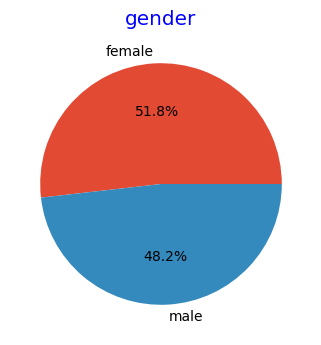

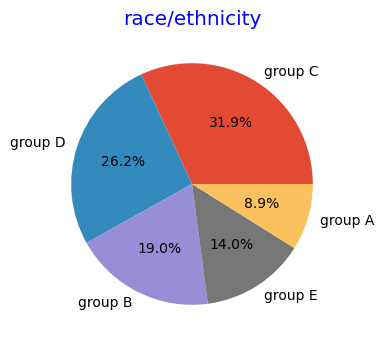

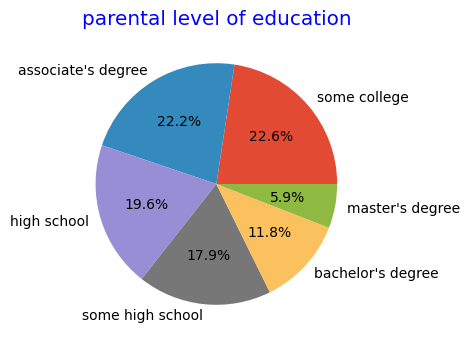

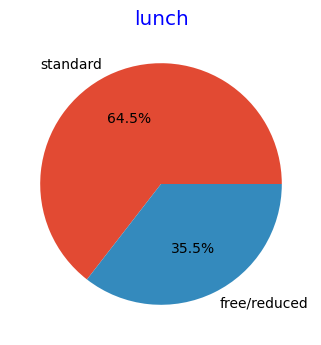

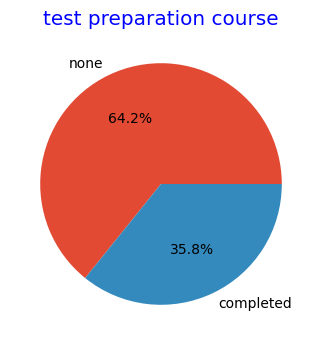

In [10]:
for category in df.columns:
    if df[category].dtype != np.int64 and df[category].dtype != np.float64:
        plt.figure(dpi=100)
        plt.pie(df[category].value_counts().values,
                labels = df[category].value_counts().index,
                autopct = '%1.1f%%')
        plt.title(category, color='blue')
        plt.show()

###  Visualization of numerical variables

+ math score

+ reading score

+ writing score


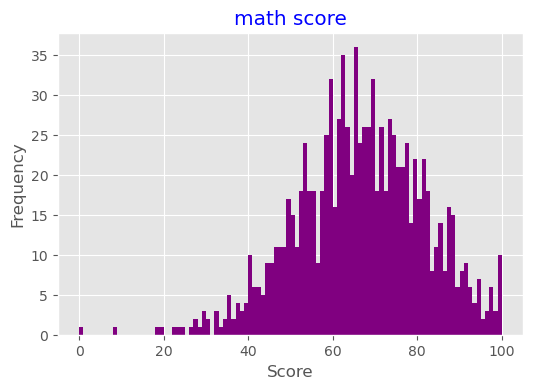

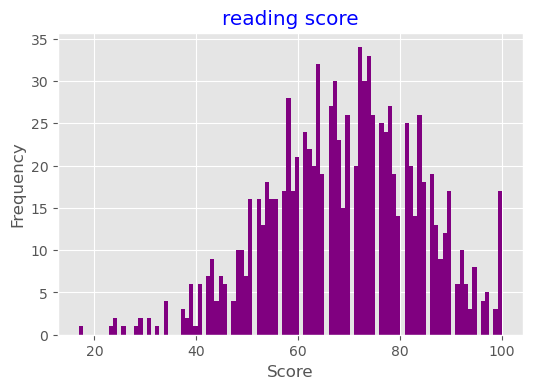

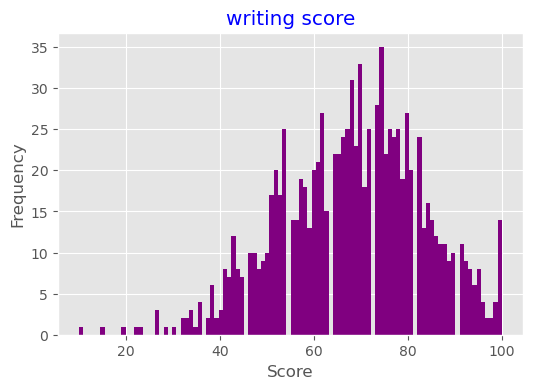

In [8]:
for num in df.columns:
    if df[num].dtype == np.int64 or df[num].dtype == np.float64:
        plt.figure(dpi=100)
        plt.hist(x =df[num], 
                 bins = 100, 
                 color = 'purple')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.title(num, color = 'blue')
        plt.show()

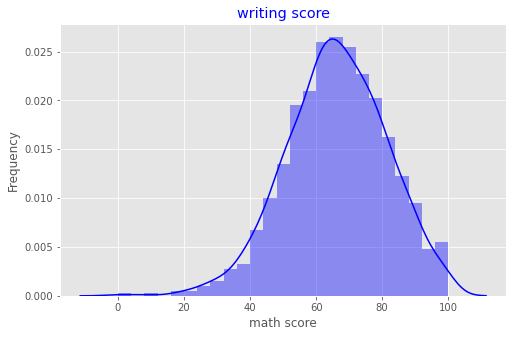

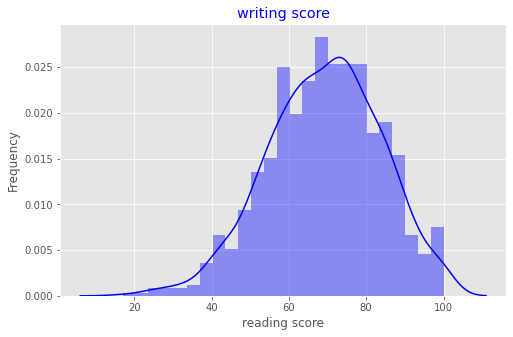

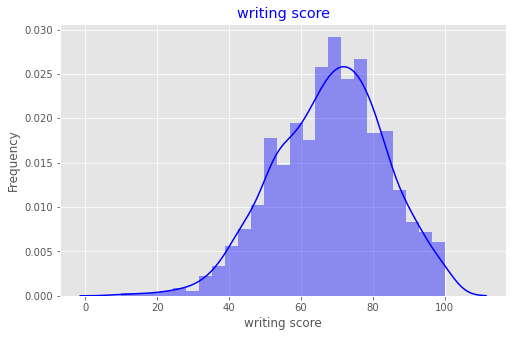

In [9]:
for score in df.columns:
    if df[score].dtype == np.int64 or df[score].dtype == np.float64:
        plt.figure(figsize=(8,5))
        sns.distplot(df[score], 
                     kde = True, 
                     color='b',
                     bins = 25)
        plt.title(num, color = 'blue')
        plt.ylabel('Frequency')
        plt.show()

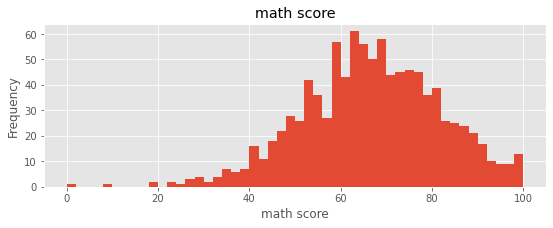

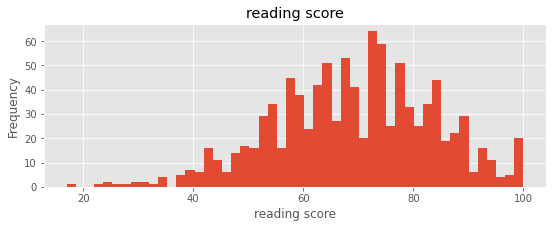

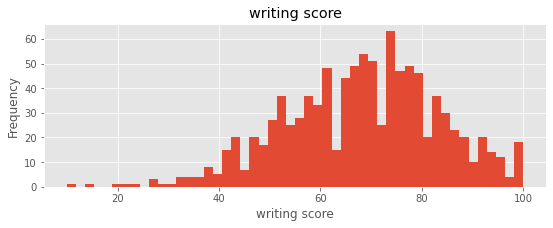

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    
for n in ['math score', 'reading score', 'writing score']:
    plot_hist(n)

#### Calulating mean across groups

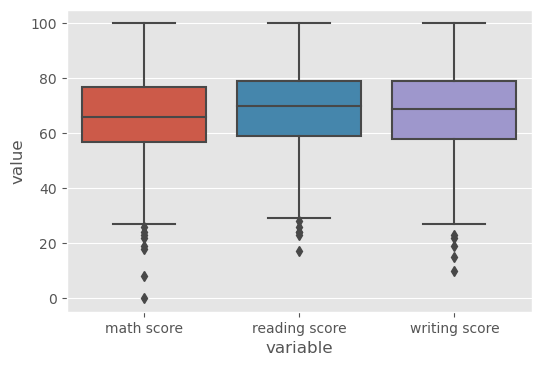

In [11]:
data = df[['math score','reading score','writing score']]
plt.figure(dpi=100)
sns.boxplot(x = "variable", 
            y = "value", 
            data = pd.melt(data))
plt.show()

In [12]:
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054


There are three tests: math, reading, and writing.
The mean score for the three test are 66, 69, and 68, respectively.

We can also use violin chart to visualize the probability density of the data at different values, usually smoothed by a kernel density estimator

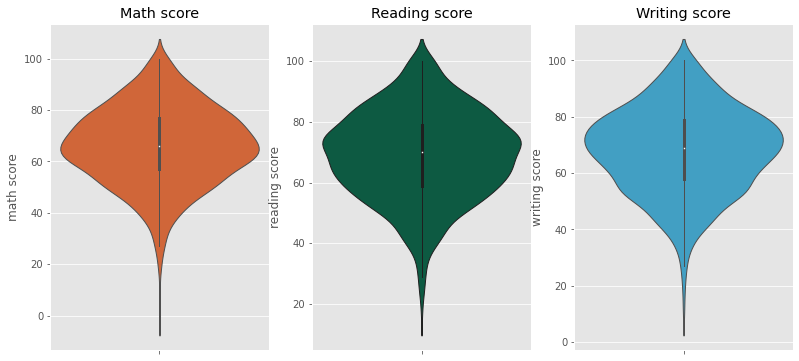

In [13]:
plt.figure(figsize=(18,6))

plt.subplot(1, 4, 1)
sns.violinplot(data = df, 
               y = 'math score',
               color = '#E95C20FF',linewidth = 1)
plt.title('Math score')

plt.subplot(1, 4, 2)
sns.violinplot(data = df, 
               y = 'reading score',
               color = '#006747FF',linewidth = 1)
plt.title('Reading score')

plt.subplot(1, 4, 3)
sns.violinplot(data = df, y = 'writing score',
               color='#2DA8D8FF',linewidth = 1)
plt.title('Writing score')

plt.show()

Most of the students score in between 60-80 in Maths whereas in Reading and Writing most of them score from 50-80.

## 2.2. Bivariate analysis

### 2.2.1. Categorical and categorical variables

* gender

* race/ethnicity

* parental level of education

* lunch

* test preparation course

#### Chi-Square Statistic

In [14]:
from scipy import stats
from scipy.stats import chi2_contingency

The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population.

Is the p-value less than .05?  If so, we can conclude that the variables are not independent of each other and that there is a statistical relationship between the categorical variables.

In [15]:
columns = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

for c1 in range(len(columns)-1):
    for c2 in range (c1+1, len(columns)):
        print("The null hypothesis Ho:", columns[c1], "and ", columns[c2], "are independent")
        contigency= pd.crosstab(df[columns[c1]], df[columns[c2]])
        stat, p, dof, expected = chi2_contingency(contigency)
        print("The chi square value is",stat)
        print("The p-value is", p)
        if p < 0.05:
            print(columns[c1], "and", columns[c2],"are dependent")
        else:
            print(columns[c1], "and", columns[c2],"are independent")
        print("-------")


The null hypothesis Ho: gender and  race/ethnicity are independent
The chi square value is 9.02738626908596
The p-value is 0.06041858784847785
gender and race/ethnicity are independent
-------
The null hypothesis Ho: gender and  parental level of education are independent
The chi square value is 3.384904766004173
The p-value is 0.6408699721807456
gender and parental level of education are independent
-------
The null hypothesis Ho: gender and  lunch are independent
The chi square value is 0.37173802316040705
The p-value is 0.5420584175146086
gender and lunch are independent
-------
The null hypothesis Ho: gender and  test preparation course are independent
The chi square value is 0.015529201882465888
The p-value is 0.9008273880804724
gender and test preparation course are independent
-------
The null hypothesis Ho: race/ethnicity and  parental level of education are independent
The chi square value is 29.45866151909779
The p-value is 0.07911304840592065
race/ethnicity and parental leve

We can see that all categorical variables are independent. 

It appears that the association between these categorical variables are very weak.

### 2.2.2. Numerical and numerical variables

#### Correlation between scores

In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC), or the bivariate correlation, is a measure of linear correlation between two sets of data.

In [16]:
### Using pair plot 

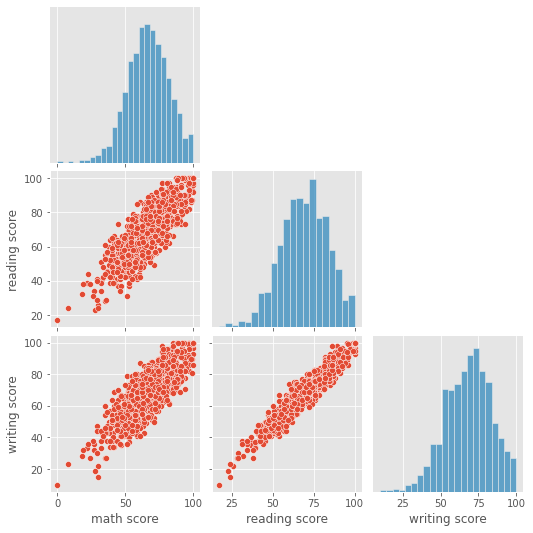

In [17]:
import seaborn as sns
sns.pairplot(df, corner=True)

In [18]:
#### Calculating correlation coefficients

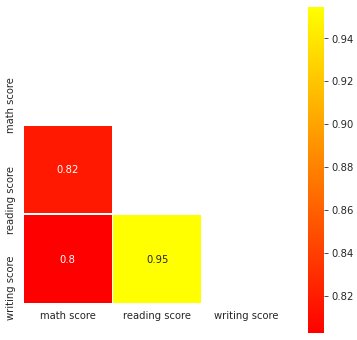

In [19]:
corr = df.corr()
corr
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn",annot=True)

The *writing score* and the *reading score* are the most strongly correlated.

Other way to put the Pearson correlation coefficient on the graph.

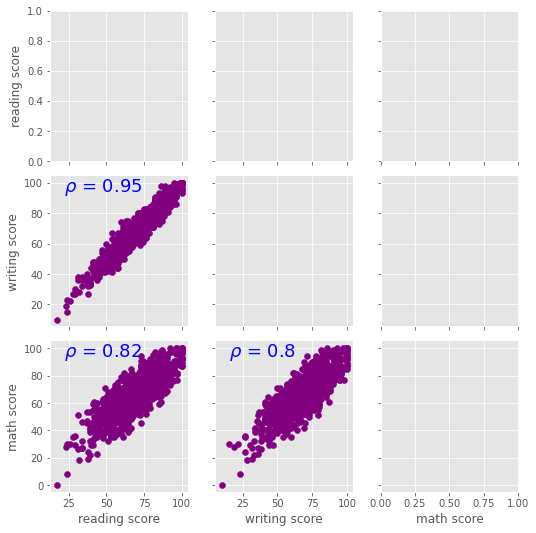

In [20]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1] 
    label = r'$\rho$ = ' + str(round(coef, 2))  
    ax = plt.gca()    
    ax.annotate(label, 
                xy = (0.1, 0.9), 
                size = 18, color =  "blue",
                xycoords = ax.transAxes)

grid = sns.PairGrid(data= df,
                    vars = ['reading score', 'writing score', 'math score'], 
                    size = 2.5)

grid = grid.map_lower(plt.scatter, color = 'purple')
grid = grid.map_lower(corr)

### Questions to answer

##### Question 1: Proportion of students who passed the test

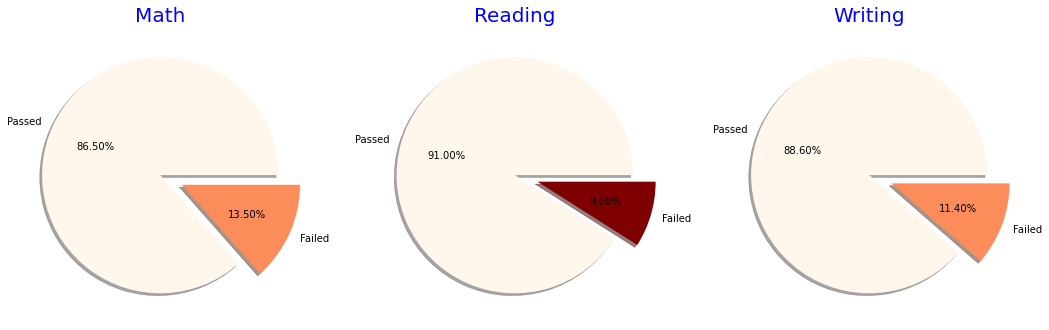

In [21]:
plt.rcParams['figure.figsize'] = (18, 12)

df['pass_math'] = np.where(df['math score'] < 50, 'Failed', 'Passed')
df['pass_reading'] = np.where(df['reading score'] < 50, 'Failed', 'Passed')
df['pass_writing'] = np.where(df['writing score'] < 50, 'Failed', 'Passed')

explode = [0, 0.2]
plt.subplot(1, 3, 1)
plt.pie(df['pass_math'].value_counts(), 
        colors = plt.cm.OrRd(np.linspace(0, 1, 3)), 
        labels =  ["Passed","Failed"], 
        autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Math', fontsize = 20,color = "blue")

explode = [0, 0.2]
plt.subplot(1, 3, 2)
plt.pie(df['pass_reading'].value_counts(), 
        colors = plt.cm.OrRd(np.linspace(0, 1, 2)), 
        labels = ["Passed","Failed"],  
        autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Reading', fontsize = 20,color = "blue")

explode = [0, 0.2]
plt.subplot(1, 3, 3)
plt.pie(df['pass_writing'].value_counts(), 
        colors = plt.cm.OrRd(np.linspace(0, 1, 3)), 
        labels = ["Passed","Failed"],  
        autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Writing', fontsize = 20, color = "blue")


plt.show()

Math seems to be the most difficult subject when compared to Reading and Writing.

##### Question 2: 

* How many students scored 100 in at least one course?

* How many students scored 100 in at least two courses?

* How many students scored 100 for all three subjects?

In [22]:
# One way

sub_df1 = df[(df['math score'] == 100) | (df['reading score'] == 100)| (df['writing score'] == 100)]
print('There are',len(sub_df1),'students who get 100 for 1 course')

sub_df2 = df[(df['math score'] == 100) & (df['reading score'] == 100) |
            (df['math score'] == 100) & (df['writing score'] == 100) |
           (df['reading score'] == 100) & (df['writing score'] == 100)]
print('There are',len(sub_df2),'students who get 100 for 2 courses')

sub_df3 = df[(df['math score'] == 100) & (df['reading score'] == 100)&(df['writing score'] == 100)]
print('There are',len(sub_df3),'students who get 100 for 3 courses')

There are 23 students who get 100 for 1 course
There are 12 students who get 100 for 2 courses
There are 3 students who get 100 for 3 courses


In [23]:
score_list = ['math score','reading score','writing score']

Q1 = 0
Q2 = 0
Q3 = 0

for tsrow in range(len(df)):
    perfect_count = 0
    for tscol in score_list:
        if df.at[tsrow,tscol] == 100:
            perfect_count = perfect_count + 1
    if perfect_count > 0:
        Q1 = Q1 + 1
        if perfect_count >=2:
            Q2 = Q2 + 1
        if perfect_count == 3:
            Q3 = Q3 + 1

print (Q1,"students scored 100 in at least one course")
print (Q2,"students scored 100 in at least two course")
print (Q3,"students scored 100 for all three subjects")

23 students scored 100 in at least one course
12 students scored 100 in at least two course
3 students scored 100 for all three subjects


#### Question 3: How many students got 100 for each subject ?

In [24]:
# Method 1
print(sum(df['writing score'] == 100), "students got 100 in writing.")
print(sum(df['reading score'] == 100), "students got 100 in reading.")
print(sum( df['math score'] == 100), "students got 100 in math.")

14 students got 100 in writing.
17 students got 100 in reading.
7 students got 100 in math.


In [25]:
# Method 2
for cols in ["writing score", "reading score","math score"]:
    print(sum(df[cols] == 100),"students got 100 in", cols)

14 students got 100 in writing score
17 students got 100 in reading score
7 students got 100 in math score


In [26]:
##### Question 3: Number of students and their correponsding grades

#### Adding columns for grade

In [40]:
def get_grade(marks):
    if marks >= 95:
        return 'A+'
    elif marks >= 87 and marks < 95:
        return 'A'
    elif marks >= 80 and marks < 87:
        return 'A-'
    elif marks >= 77 and marks < 80:
        return 'B+'
    elif marks >= 73 and marks < 77:
        return 'B'
    elif marks >= 70 and marks < 73:  
        return 'B-'
    elif marks >= 70 and marks < 73:
        return 'C+'
    elif marks >= 67 and marks < 70:
        return 'C+'
    elif marks >= 63 and marks < 67:
        return 'C'
    elif marks >= 60 and marks < 73:
        return 'C-'
    elif marks >= 56 and marks < 60:
        return 'D+'
    elif marks >= 53 and marks < 56:
        return 'D'
    elif marks >= 50 and marks < 53:
        return 'D-'
    else:
        return 'E'

df['reading grade'] = df['reading score'].apply(get_grade)
df['writing grade'] = df['writing score'].apply(get_grade)
df['math grade'] = df['math score'].apply(get_grade)

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,reading grade,writing grade,math grade
0,female,group B,bachelor's degree,standard,none,72,72,74,Passed,Passed,Passed,B-,B,B-
1,female,group C,some college,standard,completed,69,90,88,Passed,Passed,Passed,A,A,C+
2,female,group B,master's degree,standard,none,90,95,93,Passed,Passed,Passed,A+,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,Failed,Passed,Failed,D+,E,E
4,male,group C,some college,standard,none,76,78,75,Passed,Passed,Passed,B+,B,B


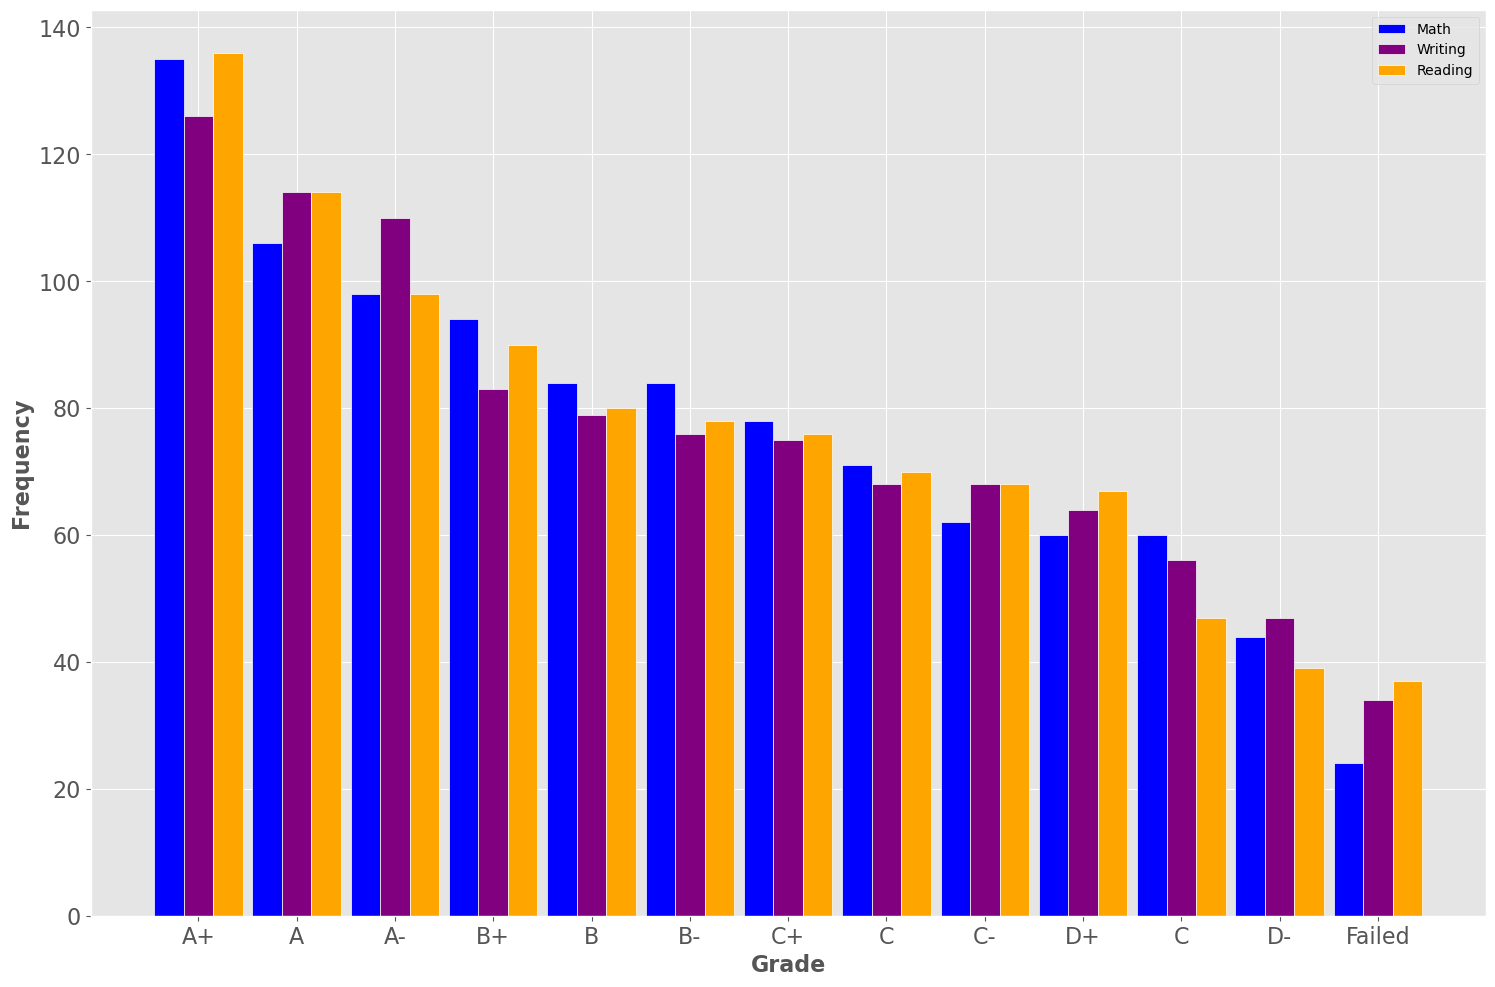

In [43]:
plt.figure(dpi=100)

# Set width of bars
barWidth = 0.30
 
# Set heights of bars
Math = df['math grade'].value_counts()
Writing = df['writing grade'].value_counts()
Reading = df['reading grade'].value_counts()
 
# Set position of bar on X axis
r1 = np.arange(len(Math))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, Math, color='blue', width=barWidth, edgecolor='white', label='Math')
plt.bar(r2, Writing, color='purple', width=barWidth, edgecolor='white', label='Writing')
plt.bar(r3, Reading, color='orange', width=barWidth, edgecolor='white', label='Reading')
 
# Add xticks on the middle of the group bars
plt.xlabel('Grade', fontweight='bold', size =16)
plt.xticks([r + barWidth for r in range(len(Math))], 
           ['A+','A','A-','B+','B','B-', 'C+','C','C-', 'D+','C','D-','Failed'],
           fontsize=16)
plt.ylabel('Frequency', fontweight='bold', size =16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

## 2.3. Multivariate analysis (numerical and categorical)

#### Determing the normality of numerical variables

##### Using Shapiro test

The null hypothesis for this test is that the data are normally distributed. 

If the chosen alpha level is 0.05 and the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. 

If the p-value is greater than 0.05, then the null hypothesis is accepted.

In [44]:
from scipy.stats import shapiro

for i in ['math score', 'reading score','writing score']:
    shapiro(df[i])
    print(i, shapiro(df[i]))

math score (0.9931505918502808, 0.00014530023327097297)
reading score (0.9929210543632507, 0.0001056220498867333)
writing score (0.9919633269309998, 2.9172901122365147e-05)


#### Using Quantile-Quantile plots

In [45]:
import pylab
import scipy.stats as stats

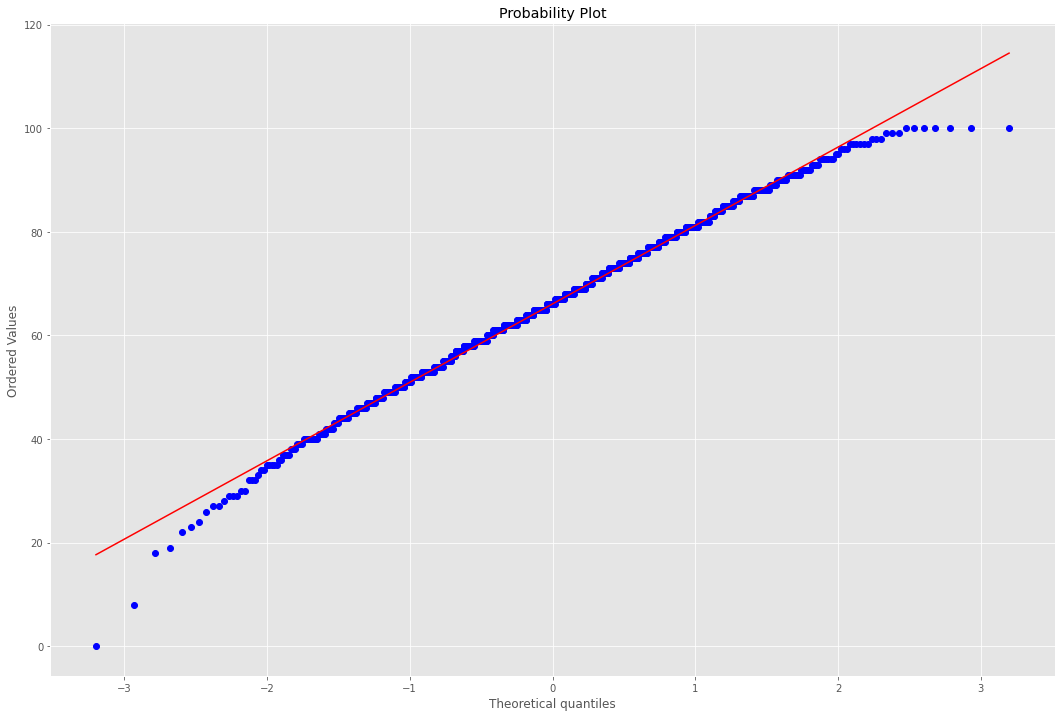

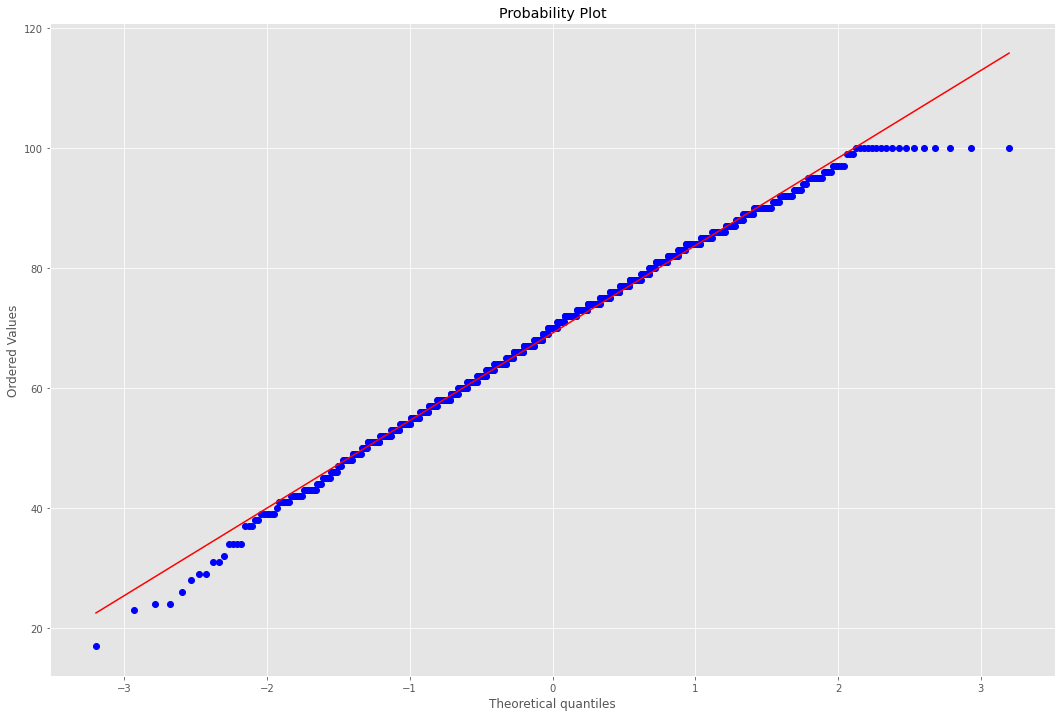

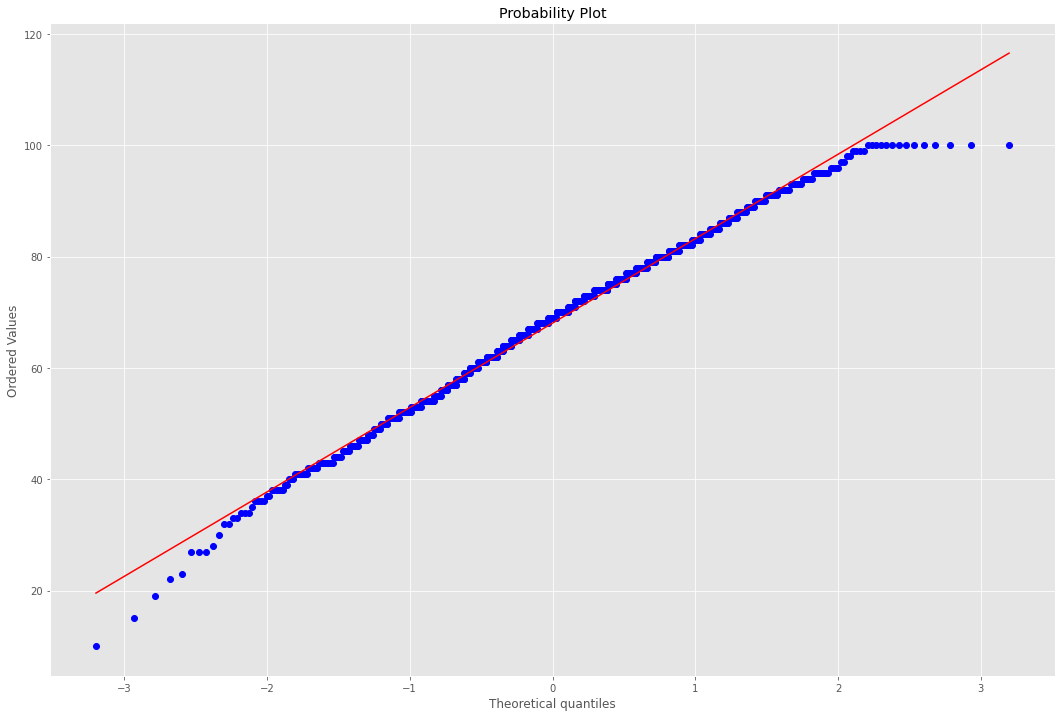

In [46]:
columns_list = ['math score','reading score','writing score']

for score in columns_list:
    stats.probplot(df[score], dist ='norm', plot = pylab)
    pylab.show()

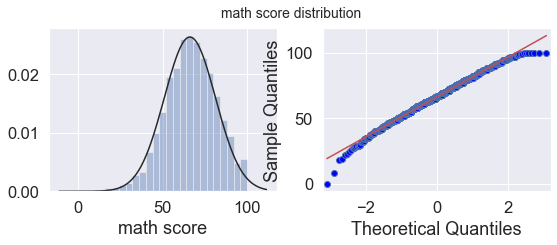

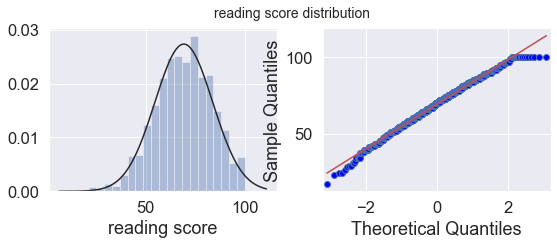

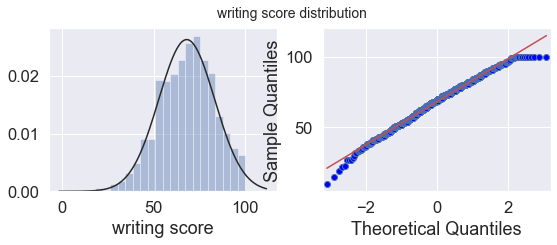

In [70]:
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

columns = ['math score', 'reading score','writing score']
def plot_dist(col):
    fig,axarr = plt.subplots(1,2,figsize=(9,3))
    sns.distplot(df[col], fit = norm, kde=False, ax=axarr[0]) 
    qqplot(df[col], line='s', ax=axarr[1])
    fig.suptitle('Distribution of', col, fontsize=14)
    plt.show()

for i in columns:
    Plot_Dist(i)

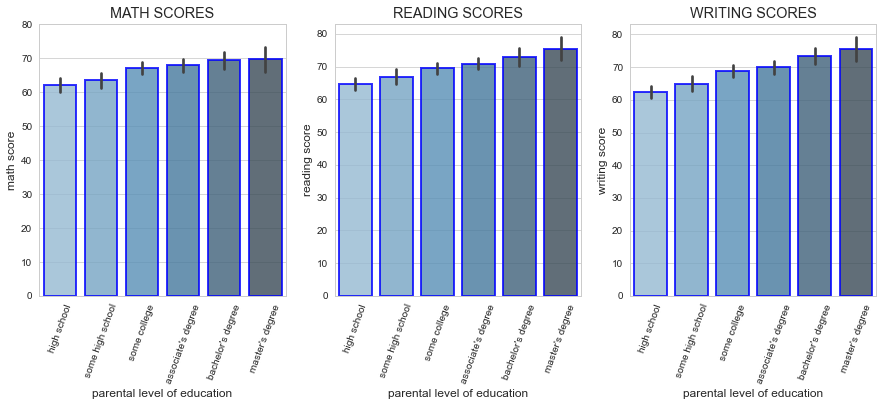

In [66]:
plt.figure(figsize=(15,5))
order = ["high school", "some high school","some college", "associate's degree","bachelor's degree","master's degree"]


plt.subplot(1, 3, 1)
sns.barplot(data=df,
            x='parental level of education',
            y='math score',
            order = order,palette=("Blues_d"),
            edgecolor='#0000ff',**{'alpha':0.8,'linewidth':2})
plt.xticks(rotation=70)
plt.ylim(0,80)
plt.title('MATH SCORES')

plt.subplot(1, 3, 2)
sns.barplot(data=df, 
            x='parental level of education',
            y='reading score',
            order = order,palette=("Blues_d"),
            edgecolor='#0000ff',**{'alpha':0.8,'linewidth':2})
plt.xticks(rotation=70)
plt.title('READING SCORES')


plt.subplot(1, 3, 3)
sns.barplot(data=df,
            x='parental level of education',
            y='writing score',
            order = order,palette=("Blues_d"),
            edgecolor='#0000ff',**{'alpha':0.8,'linewidth':2})
plt.xticks(rotation=70)
plt.title('WRITING SCORES')

plt.show()


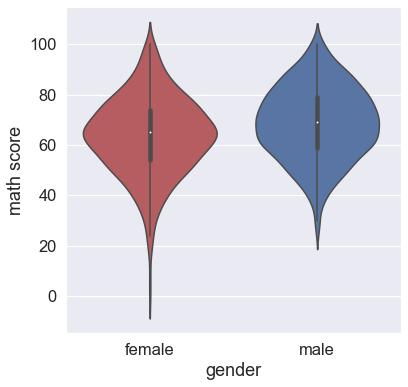

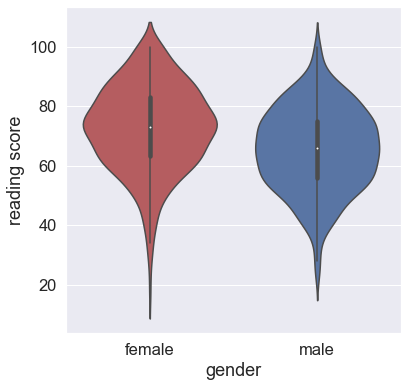

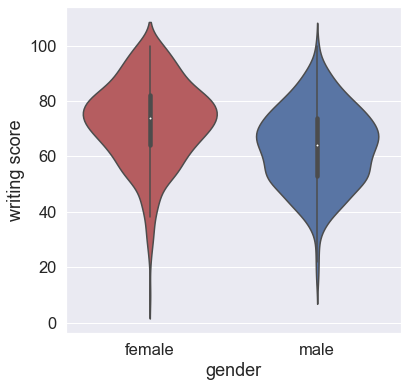

In [73]:
columns = ['math score','reading score','writing score']

for score in columns:
    plt.figure(figsize=(6,6))
    ax = sns.violinplot(x = df['gender'],
                   y = df[score],palette=['r','b'])
    sns.set(font_scale = 1.5)
    plt.show()

In [48]:
import researchpy as rp

columns = ['math score','reading score','writing score']

for score in columns:
    summary, result = rp.ttest(group1= df[score][df['gender'] == 'male'], group1_name= "Male",
             group2= df[score][df['gender'] == 'female'], group2_name= "Female")
    print(score)
    print(summary)
    print(result)

math score
   Variable       N       Mean         SD        SE  95% Conf.   Interval
0      Male   482.0  68.728216  14.356277  0.653911  67.443342  70.013090
1    Female   518.0  63.633205  15.491453  0.680655  62.296014  64.970395
2  combined  1000.0  66.089000  15.163080  0.479499  65.148060  67.029940
              Independent t-test   results
0  Difference (Male - Female) =     5.0950
1          Degrees of freedom =   998.0000
2                           t =     5.3832
3       Two side test p value =     0.0000
4      Difference < 0 p value =     1.0000
5      Difference > 0 p value =     0.0000
6                   Cohen's d =     0.3407
7                   Hedge's g =     0.3404
8               Glass's delta =     0.3549
9                           r =     0.1680
reading score
   Variable       N       Mean         SD        SE  95% Conf.   Interval
0      Male   482.0  65.473029  13.931832  0.634578  64.226142  66.719916
1    Female   518.0  72.608108  14.378245  0.631744  71.36

**Conclusion** : 
The p-value is less than the alpha level: p <.05. 

We can reject the null hypothesis that there is no difference between means.

There difference in score between male ande female students are not significant.

In [146]:
columns_list = ['math score','reading score','writing score']

for score in columns_list:
    summary, result = rp.ttest(group1 = df[score][df['lunch'] == 'standard'], 
                               group1_name =  "standard",
                               group2= df[score][df['lunch'] == 'free/reduced'], 
                               group2_name = "free/reduced")
    print(score)
    print(summary)
    print(result)

math score
       Variable       N       Mean         SD        SE  95% Conf.   Interval
0      standard   645.0  70.034109  13.653501  0.537606  68.978436  71.089781
1  free/reduced   355.0  58.921127  15.159956  0.804607  57.338716  60.503537
2      combined  1000.0  66.089000  15.163080  0.479499  65.148060  67.029940
                        Independent t-test   results
0  Difference (standard - free/reduced) =    11.1130
1                    Degrees of freedom =   998.0000
2                                     t =    11.8372
3                 Two side test p value =     0.0000
4                Difference < 0 p value =     1.0000
5                Difference > 0 p value =     0.0000
6                             Cohen's d =     0.7823
7                             Hedge's g =     0.7817
8                         Glass's delta =     0.8139
9                                     r =     0.3509
reading score
       Variable       N       Mean         SD        SE  95% Conf.   Interval
0 

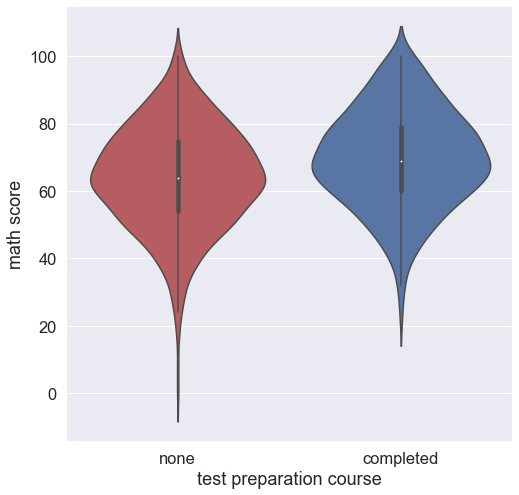

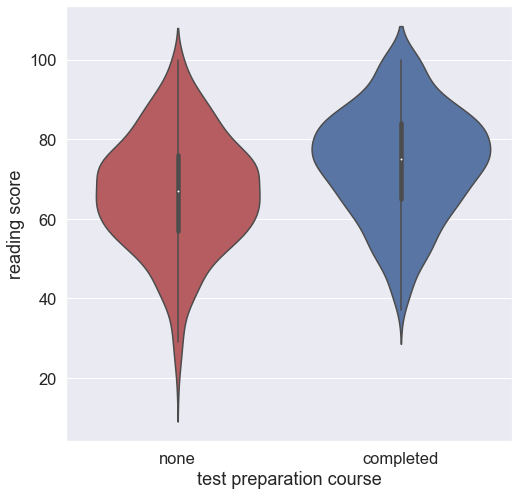

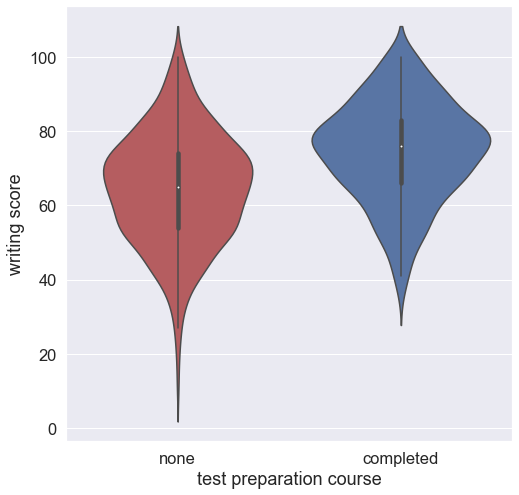

In [75]:
columns_list = ['math score','reading score','writing score']

for score in columns_list:
    plt.figure(figsize=(8,8))
    ax = sns.violinplot(x = df['test preparation course'],
                   y = df[score],palette=['r','b'])
    sns.set(font_scale = 1.5)
    plt.show()

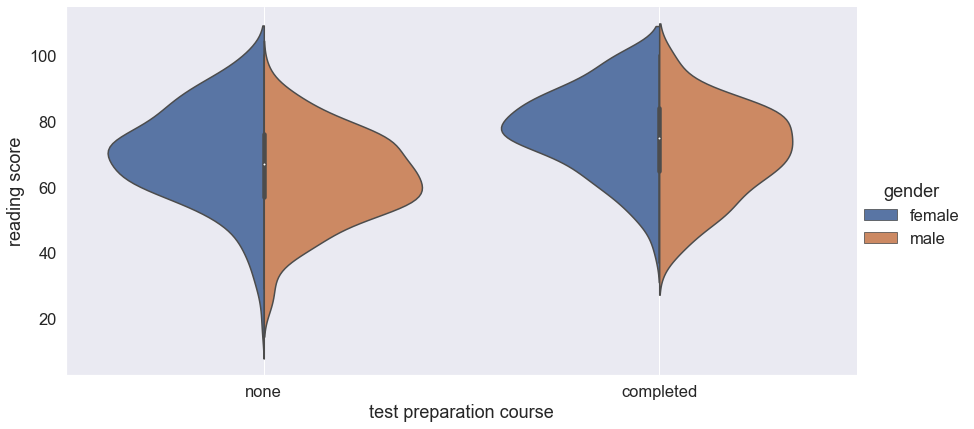

In [76]:
columns_list = ['math score','reading score','writing score']

for score in columns_list:
    summary, result = rp.ttest(group1 = df[score][df['test preparation course'] == 'none'], 
                               group1_name =  "None",
                               group2= df[score][df['test preparation course'] == 'completed'], 
                               group2_name = "Completed")
    print(score)
    print(summary)
    print(result)

math score
    Variable       N       Mean         SD        SE  95% Conf.   Interval
0       None   642.0  64.077882  15.192376  0.599595  62.900473  65.255290
1  Completed   358.0  69.695531  14.444699  0.763426  68.194153  71.196908
2   combined  1000.0  66.089000  15.163080  0.479499  65.148060  67.029940
                 Independent t-test   results
0  Difference (None - Completed) =    -5.6176
1             Degrees of freedom =   998.0000
2                              t =    -5.7046
3          Two side test p value =     0.0000
4         Difference < 0 p value =     0.0000
5         Difference > 0 p value =     1.0000
6                      Cohen's d =    -0.3763
7                      Hedge's g =    -0.3760
8                  Glass's delta =    -0.3698
9                              r =     0.1777
reading score
    Variable       N       Mean         SD        SE  95% Conf.   Interval
0       None   642.0  66.534268  14.463885  0.570844  65.413318  67.655218
1  Completed   358.

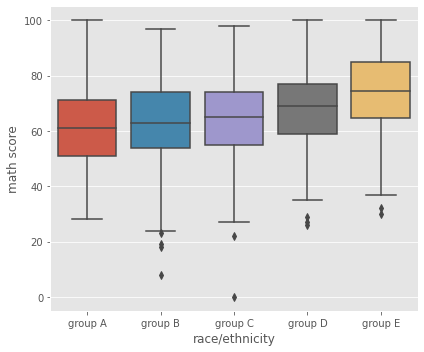

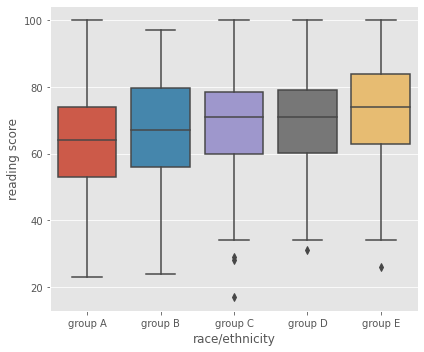

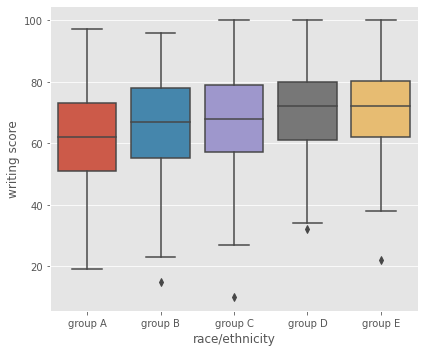

In [49]:
for i in ['math score','reading score','writing score']:
    plt.figure(figsize=(6,5))
    sns.boxplot(x = 'race/ethnicity', y = i, 
                data = df,
                order = ["group A","group B","group C","group D","group E"])
    plt.tight_layout()

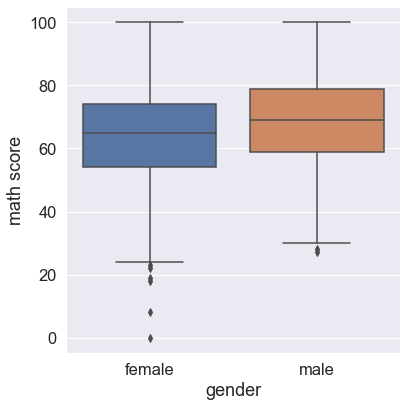

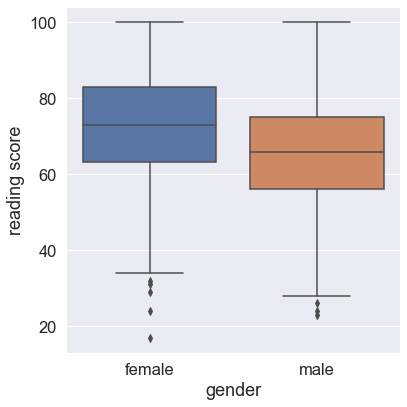

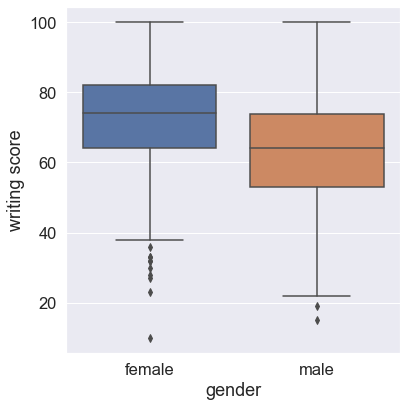

In [96]:
columns_list = ['math score','reading score','writing score']

for i in columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(data = df,
                x = 'gender', 
                y = i)
    plt.tight_layout()

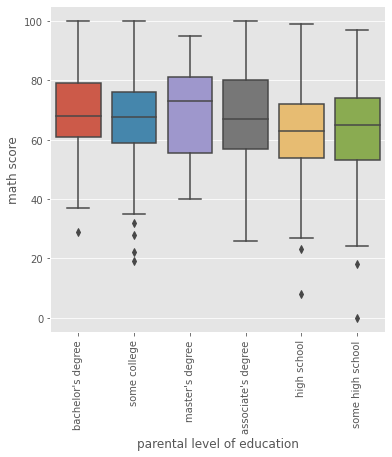

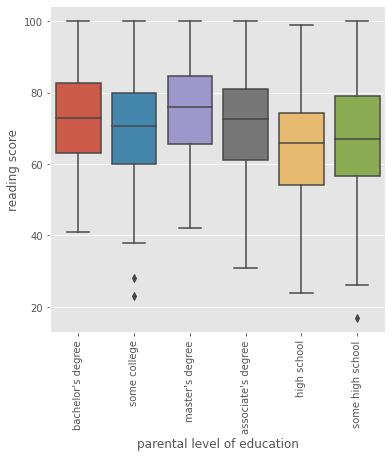

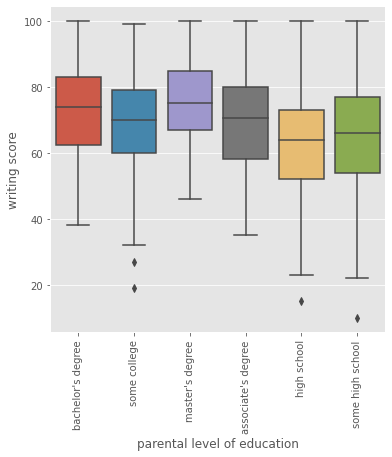

In [50]:
columns_list = ['math score','reading score','writing score']

for i in columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(data = df,
                x = 'parental level of education', 
                y = i)
    plt.xticks(rotation = 90)

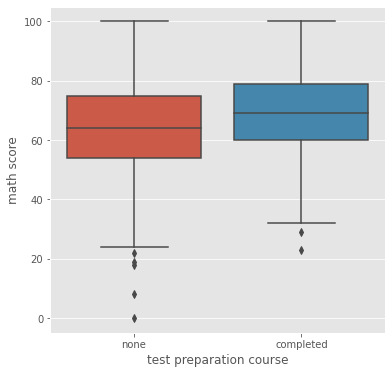

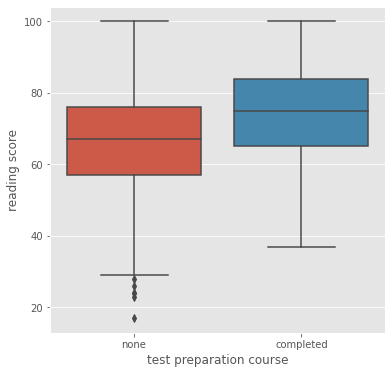

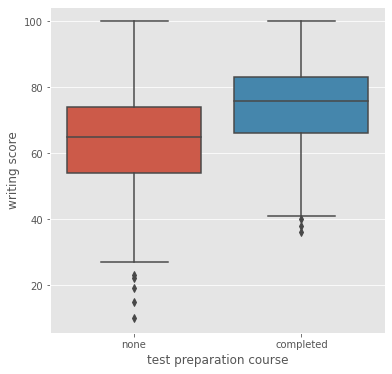

In [51]:
for i in ['math score','reading score','writing score']:
    plt.figure(figsize=(6,6))
    sns.boxplot(data = df,
                x = 'test preparation course', 
                y = i)

### Three variables

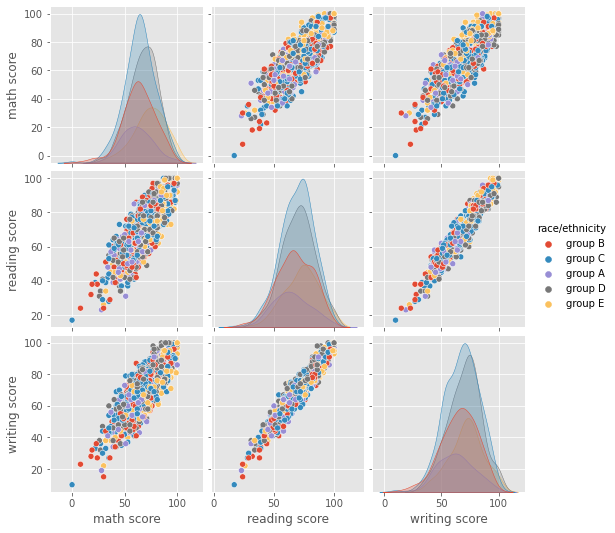

In [52]:
sns.pairplot(df , hue='race/ethnicity')

Female students perform better than Male students. Of course, in Maths, Male students outperform Female Students.

Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

In [110]:
columns_list = ['math score','reading score','writing score']

for score in columns_list:
    shapiro_test = shapiro(df[score])
    print(shapiro_test)

ShapiroResult(statistic=0.9931505918502808, pvalue=0.00014530023327097297)
ShapiroResult(statistic=0.9929210543632507, pvalue=0.0001056220498867333)
ShapiroResult(statistic=0.9919633269309998, pvalue=2.9172901122365147e-05)


All p-values are less than 0.05.
We reject the null hypotheis
Conclusion : These are not normally distributed

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed

In [112]:
from plotly.offline import init_notebook_mode, iplot, plot

In [113]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

The p-value is much smaller than 0.05. We reject the null hypothesis. 

There are a statistically significant difference in scores.

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed

### Number of Students having maximum marks in all three categories

In [55]:
perfect_writing = df['writing score'] == 100
perfect_reading = df['reading score'] == 100
perfect_math = df['math score'] == 100

perfect_score = df[(perfect_math) & (perfect_reading) & (perfect_writing)]
perfect_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,reading grade,writing grade,math grade
458,female,group E,bachelor's degree,standard,none,100,100,100,Passed,Passed,Passed,A+,A+,A+
916,male,group E,bachelor's degree,standard,completed,100,100,100,Passed,Passed,Passed,A+,A+,A+
962,female,group E,associate's degree,standard,none,100,100,100,Passed,Passed,Passed,A+,A+,A+


In [120]:
perfect_writing = df['writing score'] >= 90
perfect_reading = df['reading score'] >= 90
perfect_math = df['math score'] >=90 

In [121]:
print(sum(perfect_writing))
print(sum(perfect_reading))
print(sum(perfect_math))

78
79
58


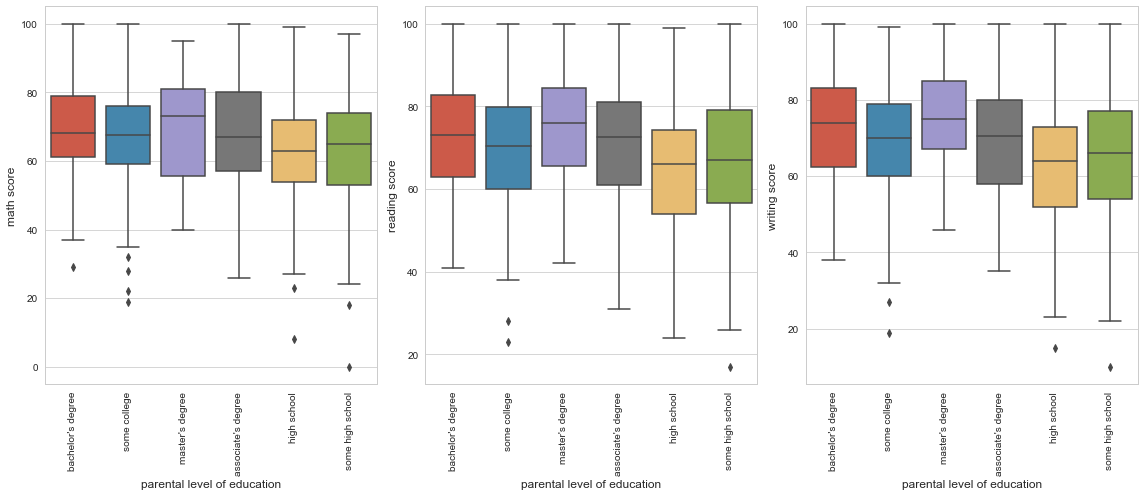

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
sns.boxplot(x ='parental level of education' , y = 'math score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.boxplot(x ='parental level of education' , y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.boxplot(x ='parental level of education' , y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

# Extra Datavis

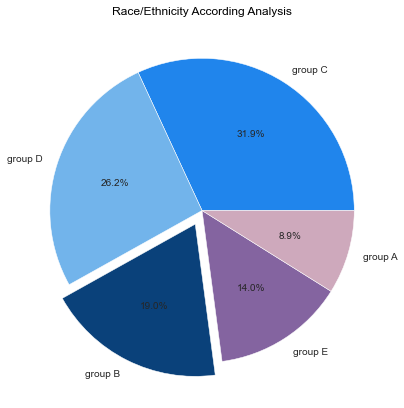

In [58]:
plt.figure(figsize=(7,7))

plt.pie(df['race/ethnicity'].value_counts().values,
        explode = [0,0,0.1,0,0],
        labels = df['race/ethnicity'].value_counts().index,
        colors = ['#2085ec','#72b4eb','#0a417a','#8464a0','#cea9bc'],
        autopct = '%1.1f%%')

plt.title('Race/Ethnicity According Analysis', color='black', fontsize = 12)
plt.show()

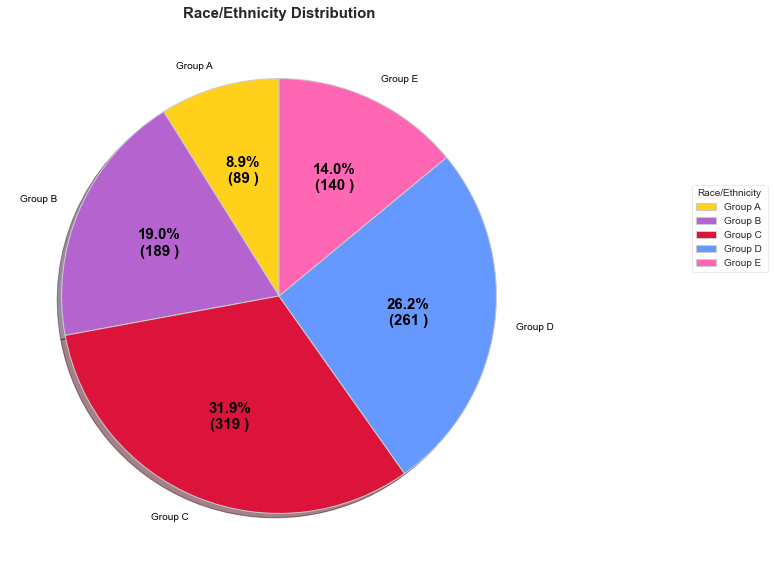

In [59]:
race = ['Group A', 'Group B ', 'Group C',  
        'Group D', 'Group E'] 
  
data = [89, 190, 319, 262, 140] 
  

# Creating color parameters 
colors = (  "#ffd11a", "#b463cf", 
          "#DC143C", "#6699ff", "#ff66b3" ) 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} )".format(pct, absolute) 


# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 


wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  labels = race, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="#000000")) 
  
# Adding legend 
ax.legend(wedges, race, 
          title ="Race/Ethnicity", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 0, 1.25)) 
  
plt.setp(autotexts, size = 15, weight ="bold") 
ax.set_title("Race/Ethnicity Distribution", fontsize=15, fontweight='bold') 
  
# show plot 
plt.show()

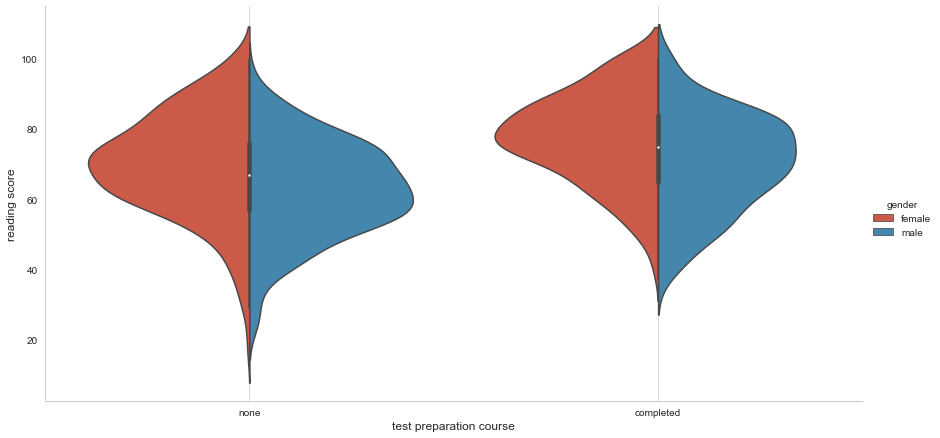

In [60]:
sns.catplot(x="test preparation course",
            y="reading score", 
            kind='violin', 
            hue='gender', 
            split='true', 
            data=df, height=6, aspect=2);
plt.grid()

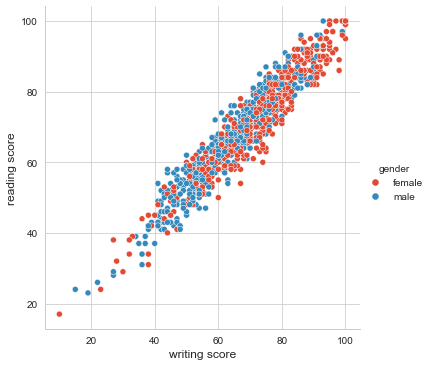

In [62]:
sns.relplot(x='writing score',y='reading score',hue='gender',data=df)

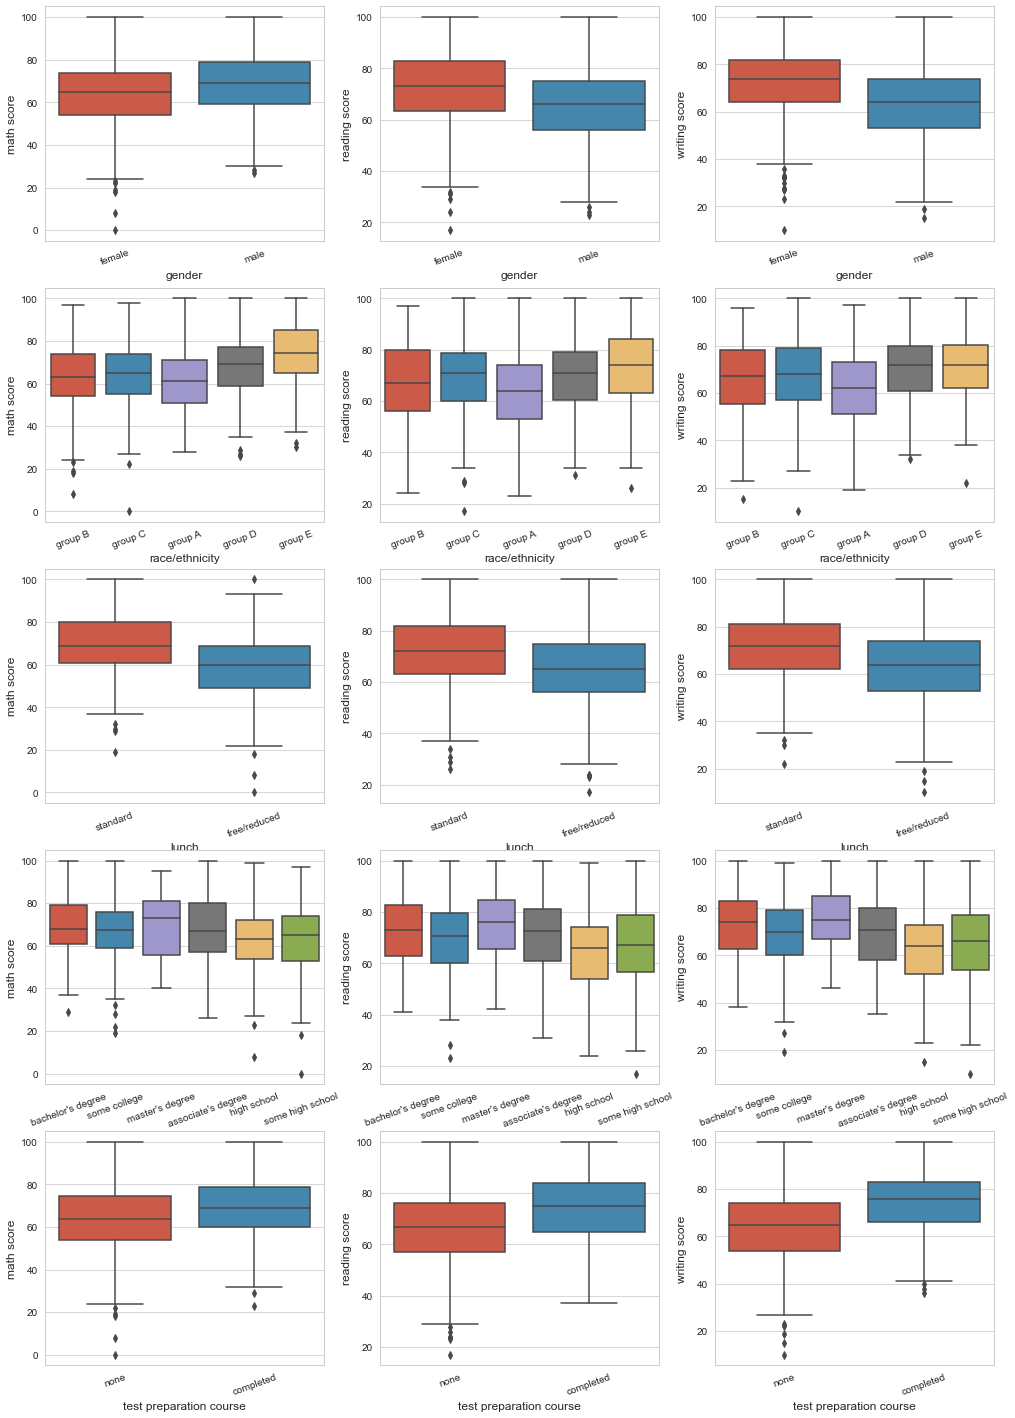

In [65]:
def boxplot(data, xcols, ycols):
    n = 1
    x_cnt = len(xcols)
    y_cnt = len(ycols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    for x_ax in xcols:
        for i in ycols:
            ax = figure.add_subplot(x_cnt, y_cnt, n)
            g = sns.boxplot(x = data[x_ax], y = data[i])
            g.set_xticklabels(g.get_xticklabels(), rotation=20)
            n = n + 1
            
ycols = ['math score', 'reading score', 'writing score']
xcols = ['gender', 'race/ethnicity','lunch','parental level of education','test preparation course']

boxplot(df, xcols, ycols)